In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:

file_path = r'C:\Users\Kashi\Downloads\Fraud_check.csv'

# Read the CSV file
df = pd.read_csv(file_path)


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
columns_to_encode = ['Undergrad', 'Marital.Status', 'Urban']

In [6]:
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [25]:
df['Taxable.Income.Class'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [26]:
x = df.drop(['Taxable.Income', 'Taxable.Income.Class'], axis=1)
y = df['Taxable.Income.Class']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

In [28]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [33]:

model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
ypred = model.predict(x_test)
ypred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [35]:
model.score(x_train,y_train)

0.80625

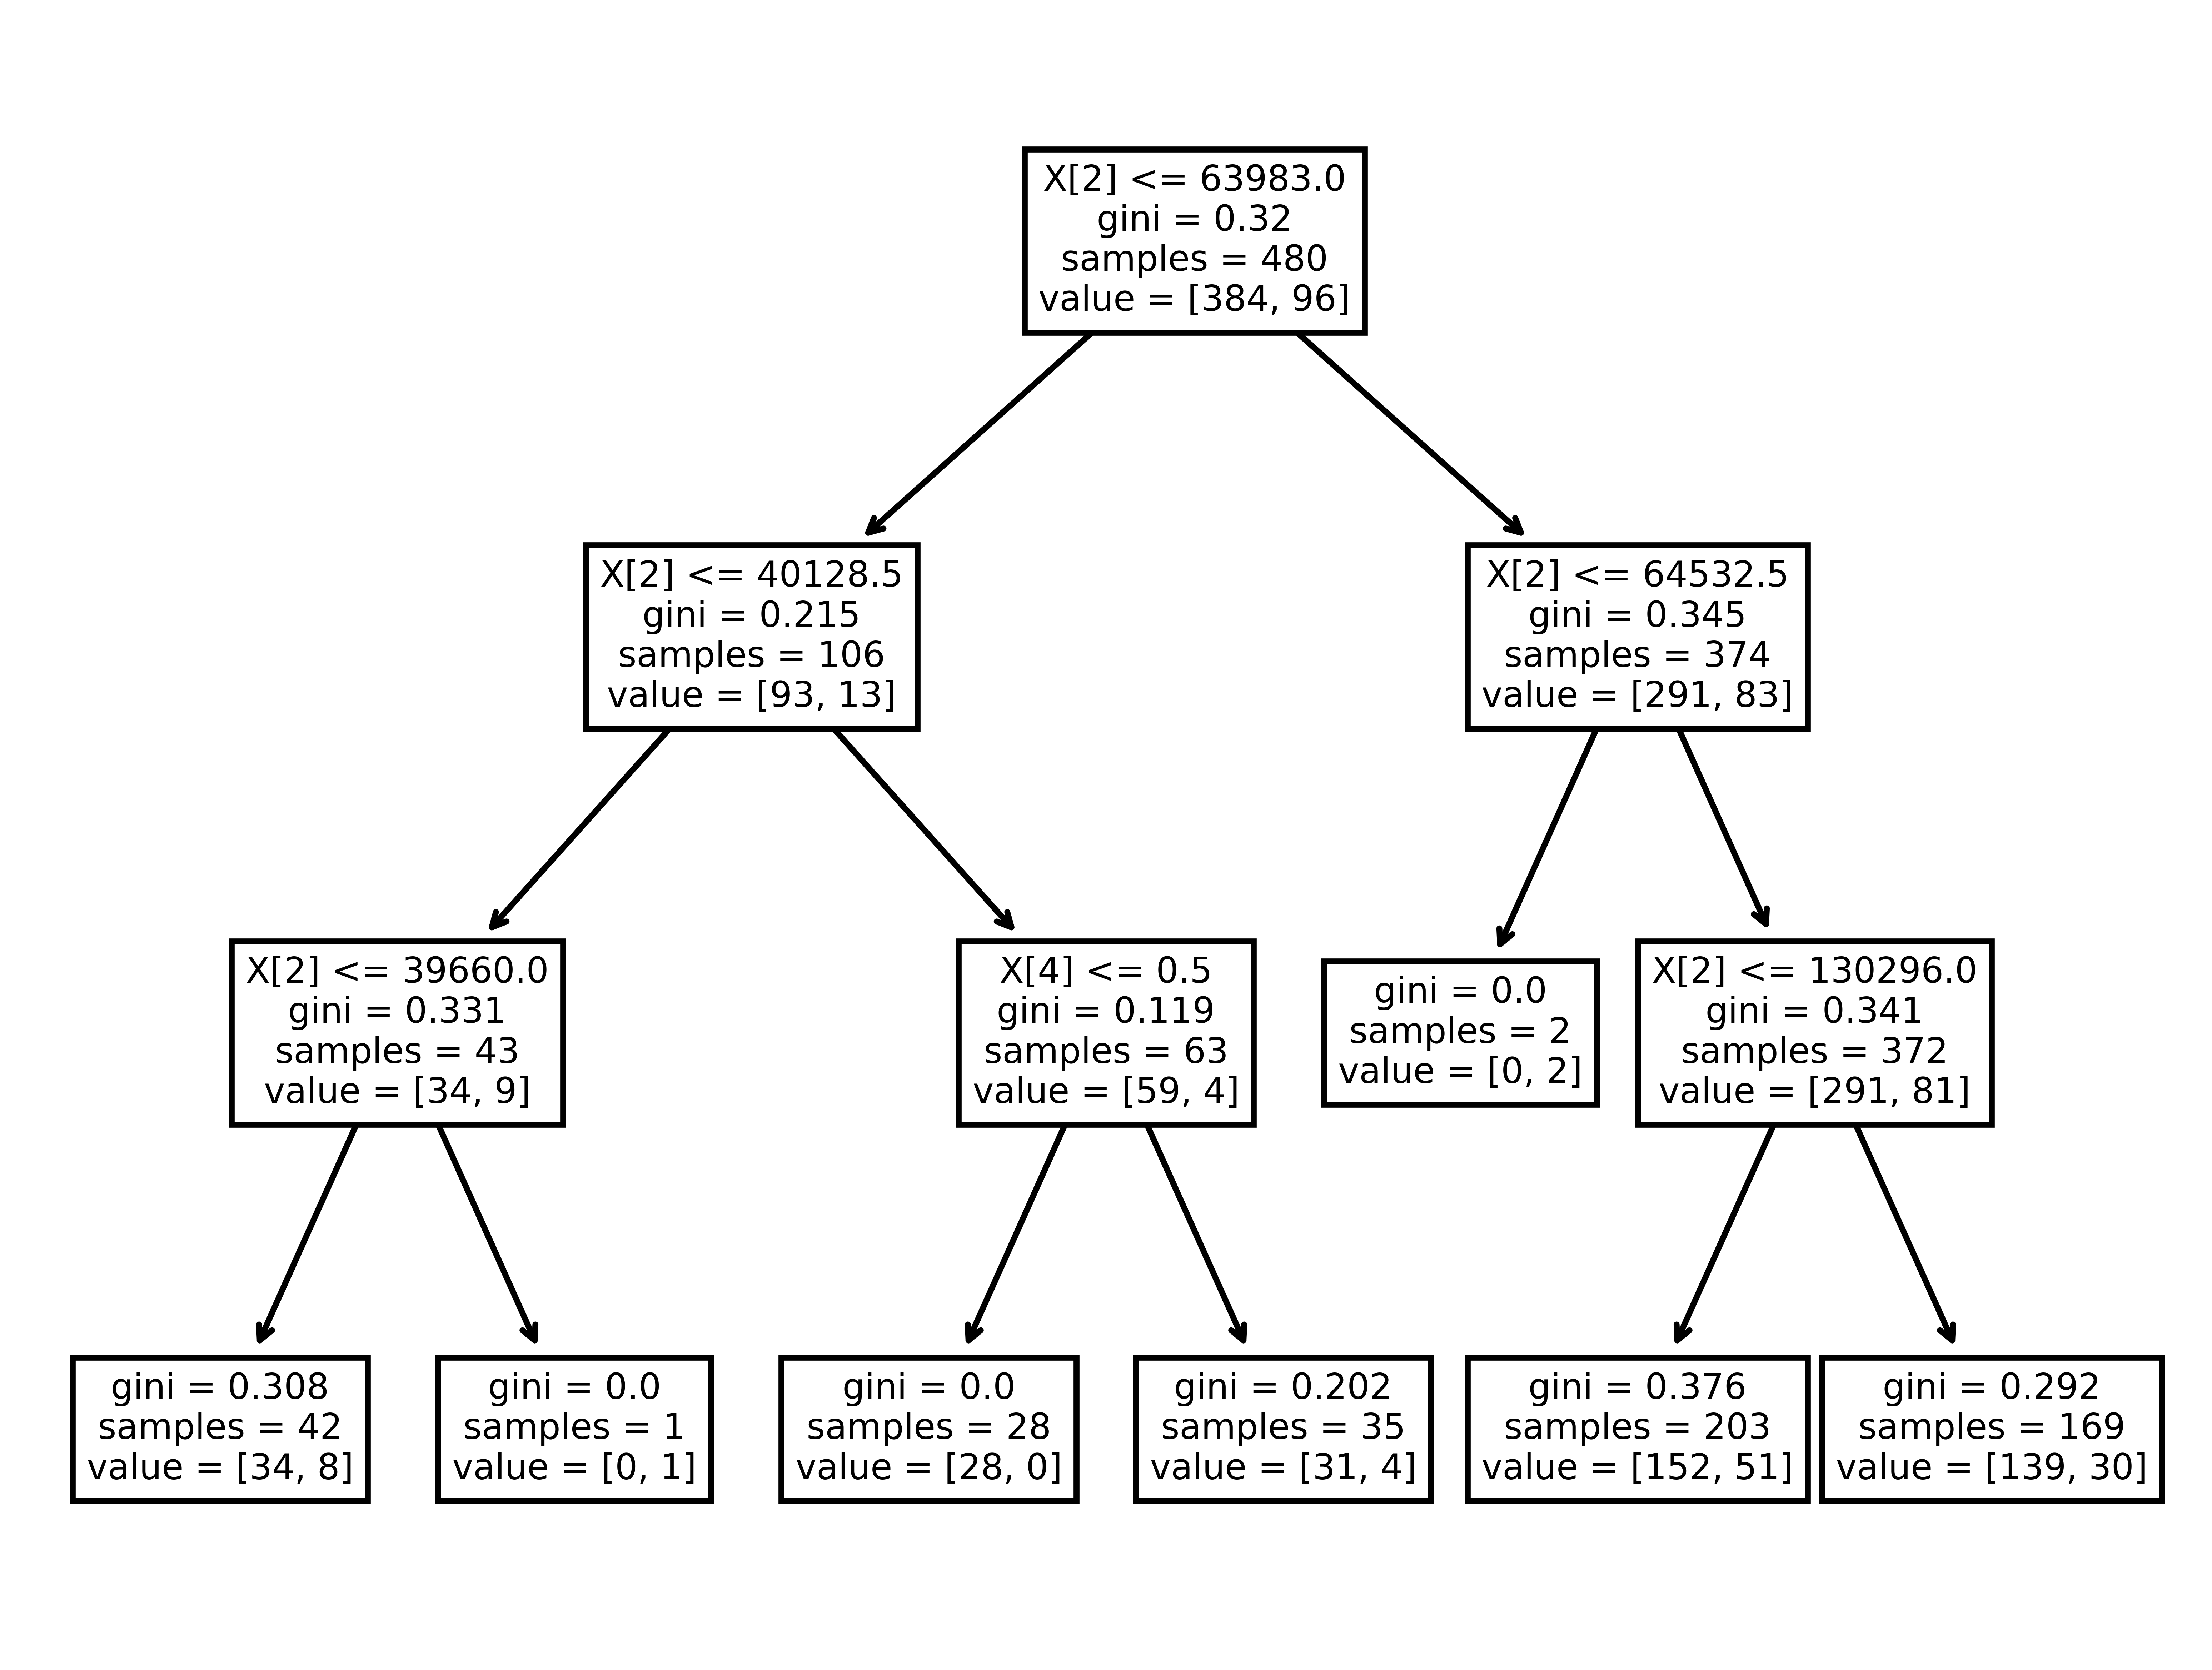

In [36]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [37]:
from sklearn.tree import plot_tree

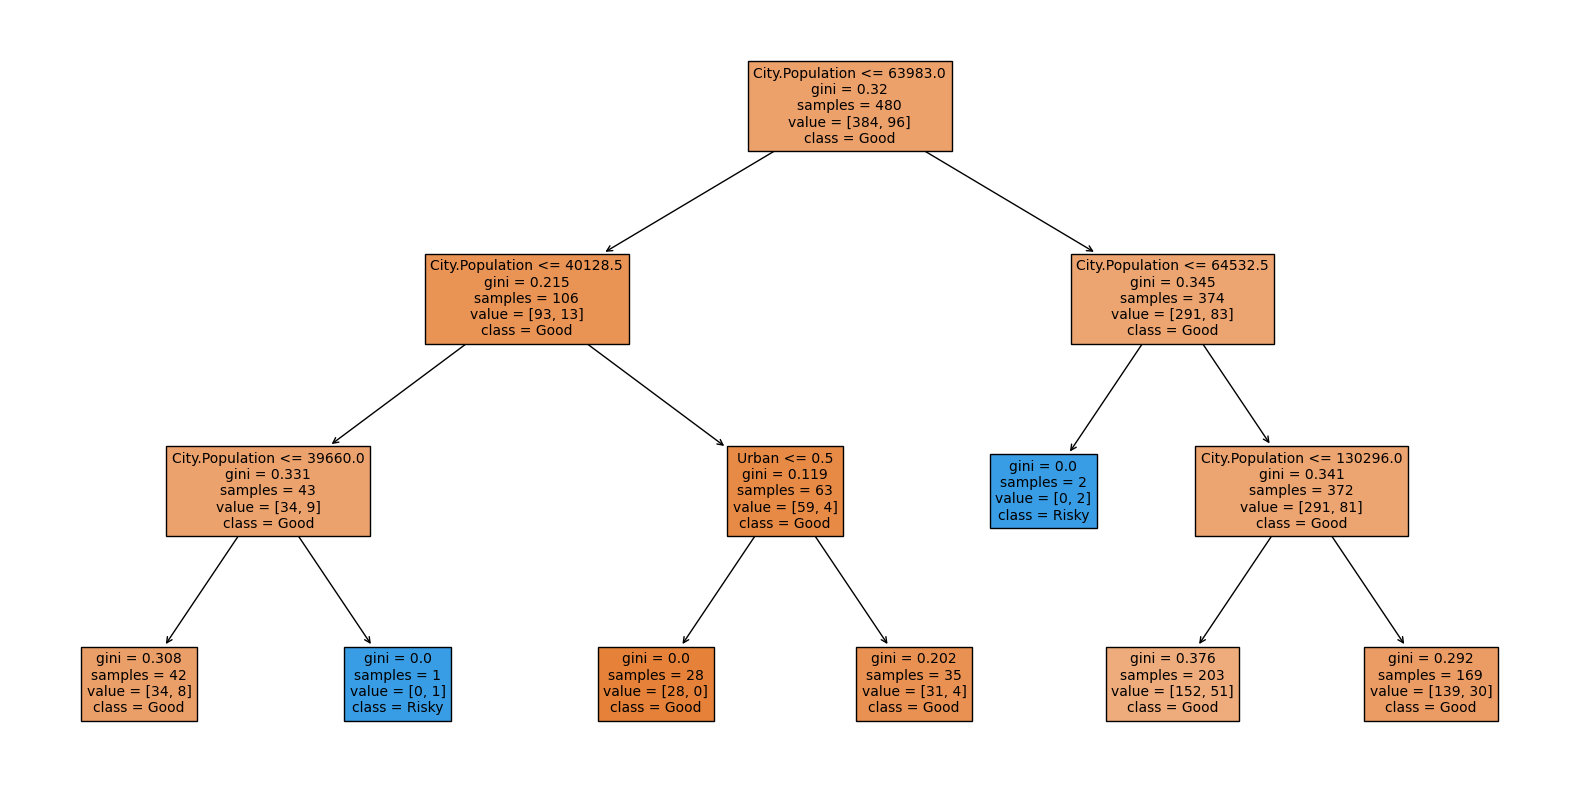

In [41]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=model.classes_, filled=True,fontsize=10, max_depth=3)
plt.show()

In [40]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        Good       0.76      0.99      0.86        92
       Risky       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



In [42]:
model.feature_importances_

array([0.        , 0.        , 0.94815922, 0.        , 0.05184078])